# Pandas Dataframe Exploration - Lending Club

Now, let's try and use the Pandas' Dataframe structure to analyze a dataset from the Lending Club. The [Lending Club](https://www.lendingclub.com/) is a peer-to-peer lending site where members make loans to each other. For this exercise, we'll be using a public dataset that is generously hosted by Spark. This notebook can be downloaded (with associated data) from its repo.


## Problem
Any good statistical analysis should start with a fundamental question. Since we are working with a dataset of loans, what interesting questions would we like the answer to? Some options include:

* How likely a loan is to default?
* How is the interest rate of a loan computed from the various loan variables?
* How likely is an individual, with certain attributes, to get his/her loan approved?

While these are all interesting questions, they are fundamentally different and so require different approaches. Today we will explore the second question further and investigate how the interest rate of a loan can be estimated by various different factors.

## Process

So we want to explore these data, and try to gain some insights into what might be useful in creating a linear regression model. Most importantly, we want to try and separate out "the noise". To do so, we follow the following steps:

* Browse the data
* Data cleanup
* Visual exploration
* Model derivation

These steps are universal to quality Data Science analysis and should be used for nearly every dataset.

## Browse the Data
Let us try and understand the data first. We have a long list of variables:

* Amount.Requested - numeric. The amount (in dollars) requested in the loan application.
* Amount.Funded.By.Investors - numeric. The amount (in dollars) loaned to the individual.
* Interest.rate – character. The lending interest rate charged to the borrower.
* Loan.length - character. The length of time (in months) of the loan.
* Loan.Purpose – categorical variable. The purpose of the loan as stated by the applicant.
* Debt.to.Income.Ratio – character The % of consumer’s gross income going toward paying debts.
* State - character. The abbreviation for the U.S. state of residence of the loan applicant.
* Home.ownership - character. Indicates whether the applicant owns, rents, or has a mortgage.
* Monthly.income - categorical. The monthly income of the applicant (in dollars).
* FICO.range – categorical (expressed as a string label e.g. “650-655”). A range indicating the applicants FICO score.
* Open.CREDIT.Lines - numeric. The number of open lines of credit at the time of application.
* Revolving.CREDIT.Balance - numeric. The total amount outstanding all lines of credit.
* Inquiries.in.the.Last.6.Months - numeric. Number of credit inquiries in the previous 6 months.
* Employment.Length - character. Length of time employed at current job.

Which variable are we really looking to try to understand?

    Interest.rate – character. The lending interest rate charged to the borrower.


## Data Cleanup

But before we can do anything more, we need to process our data and make sure that it is clean.

In [11]:
%matplotlib inline
# first we ingest the data from the source on the web
# this contains a reduced version of the data set from Lending Club
import pandas as pd
loansData = pd.read_csv('https://spark-public.s3.amazonaws.com/dataanalysis/loansData.csv')
loansData['Interest.Rate'][0:5] # first five rows of Interest.Rate


81174     8.90%
99592    12.12%
80059    21.98%
15825     9.99%
33182    11.71%
Name: Interest.Rate, dtype: object

In [12]:
loansData['Loan.Length'][0:5] # first five rows of Loan.Length


81174    36 months
99592    36 months
80059    60 months
15825    36 months
33182    36 months
Name: Loan.Length, dtype: object

In [13]:
loansData['FICO.Range'][0:5] # first five rows of FICO.Range


81174    735-739
99592    715-719
80059    690-694
15825    695-699
33182    695-699
Name: FICO.Range, dtype: object

What do you notice about this data? It seems to be complete, which is good, but it still can't be processed by an algorithm yet.

We see here that:
* the interest rate information has "%" symbols in it.
* loan length has " months" in it

**Exercise One**: See if you can find the following errors in the data:
* there are a couple of values that are so large they must be typos
* some values are missing "NA" values i.e. not available.
* the FICO Range is really a numeric entity but is represented as a categorical variable in the data.



In [4]:
## To-do: Exercise One

"""
Print out one data entry for each of the following errors:
1) Outlier values
2) Entries with "NA" values
3) Incorrect data types
"""

'\nPrint out one data entry for each of the following errors:\n1) Outlier values\n2) Entries with "NA" values\n3) Incorrect data types\n'

FICO Range is represented as a categorical variable in the data.

We need to change the categorical variable for FICO Range into something numeric so that we can use it in our calculations. As it stands, the values are merely labels, and while they convey meaning to humans, our software can't interpret them as the numbers they really represent.

So as a first step, we convert them from categorical variables to strings. So the abstract entity 735-739 becomes a string "735-739". Then we parse the strings so that a range such as "735-739" gets split into two numbers (735,739).
Finally we pick a single number to represent this range. We could choose a midpoint but since the ranges are narrow we can get away with choosing one of the endpoints as a representative. Here we arbitrarily pick the lower limit and with some imperious hand waving, assert that it is not going to make a major difference to the outcome.
In a further flourish of imperiousness we could declare that "the proof is left as an exercise to the reader". But in reality there is really no such formal "proof" other than trying it out in different ways and convincing oneself. If we wanted to be mathematically conservative we could take the midpoint of the range as a representative and this would satisfy most pointy-haired mathematician bosses that "Data Science Dilbert" might encounter.

To summarize - cleaning our data involves:
* removing % signs from rates
* removing the word ” months" from loan length.
* managing outliers - remove such rows in this case
* managing NA - remove such rows in this case

*Notes:*
* There is one especially high outlier with monthly income > 100K+.This is likely to be a typo and is removed as a data item.
* There is also one data item with all N/A - this is also removed.

**Exercise Two**: Perform each of the above steps on the dataset:
* import the data
* remove the '%' suffix from each row
* remove the ' months' suffix from each row
* remove the outlier rows
* remove rows with NA

In [ ]:
## To-do: Exercise Two

# import the data

# remove the '%' suffix from each row

# remove the ' months' suffix from each row

# remove the outlier rows

# remove rows with NA

## Visual Exploration

Now we are going to follow a standard set of steps in exploring data. We apply the following simple visualizations. This is something we will typically also do for other data sets we encounter in other explorations.

### Histogram

A histogram shows us the shape of the distribution of values for a single variable. On the x-axis we have the variable under question, divided into buckets or bins. This is a key feature of a histogram.

The bin size is adjustable and different bin sizes give different information. A large bin size gives us an idea of the coarser grained structure of the distribution while a smaller bin size will shine light on the finer details of the distribution. In either case we can compare distributions, or quickly identify some key hints that tell use how best to proceed.

With the distribution of FICO scores we see the histogram below.


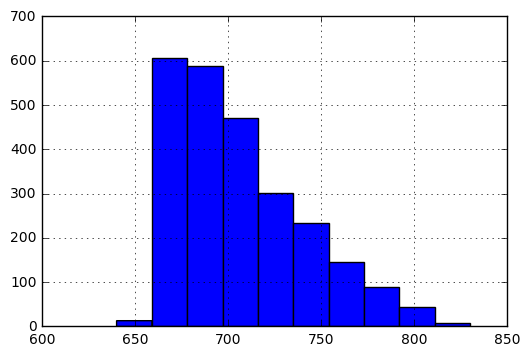

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure()
loansmin = pd.read_csv('loanf.csv')
fico = loansmin['FICO.Score']
p = fico.hist()


Why are we looking at the FICO score? Because we know from domain knowledge that this is the primary determinant of interest rate.
The histogram shows us that the distribution is not a normal or gaussian distribution but that there are some other factors that might be affecting or distorting the shape of the distribution away from the bell curve. We want to dig a little deeper.

### Box Plot

Next we take a box plot which allows us to quickly look at the distribution of interest rates based on each FICO score range.


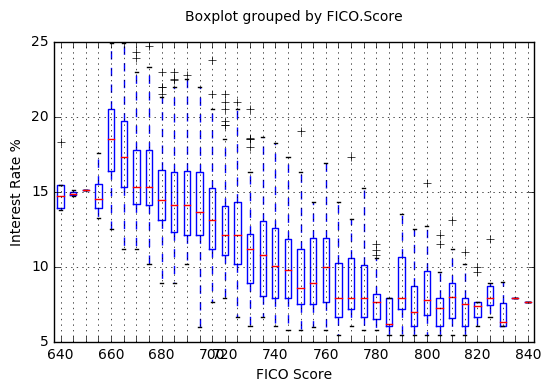

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure()
loansmin = pd.read_csv('loanf.csv')

p = loansmin.boxplot('Interest.Rate','FICO.Score')
q = p.set_xticklabels(['640','','','','660','','','','680','','','','700',
  '720','','','','740','','','','760','','','','780','','','','800','','','','820','','','','840'])

q0 = p.set_xlabel('FICO Score')
q1 = p.set_ylabel('Interest Rate %')
q2 = p.set_title('                          ')


First of all, this tells us that there is a general downward trend in interest rate for higher FICO scores. But, given the same range of FICO scores we see a range of interest rates, not a single value - so it appears there are other factors determining interest rate, given a fixed FICO score range. We still need to investigate the impact of these other factors and quantify their impact.

So, what might these other factors be?

Let's use a little domain knowledge again. We know that interest rate is based on risk to the borrower: the greater the risk, the greater the interest rate charged to compensate for the risk. Another factor that might affect risk is the size of the loan - the larger the amount the greater the risk of non-payment and also the greater the negative impact of actual default.
We will need to look at multiple factors and how they might affect the interest rate.

A great way to look at multiple factors simultaneously is the scatterplot matrix.

### Scatterplot Matrix

A scatter-what???

The scatterplot matrix is a grid of plots of multiple variables against each other. It shows the relationship of each variable to the others. The ones on the diagonal don't fit this pattern. Why not? What does it mean to find the relationship of something to itself, in this context. Not much, since we are trying to determine the impact of some variable on another variable.
We're going to look at a scatterplot matrix of the five variables in our data.



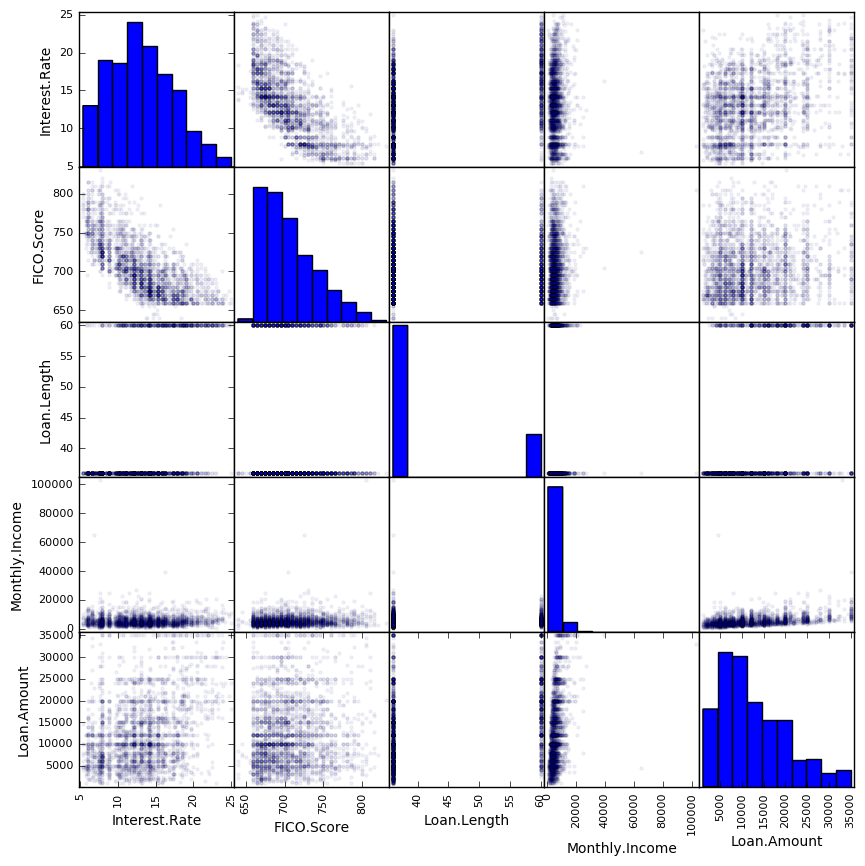

In [16]:
## TRY THIS!
import pandas as pd
loansmin = pd.read_csv('loanf.csv')
a = pd.scatter_matrix(loansmin,alpha=0.05,figsize=(10,10), diagonal='hist')
## Click on the line above
## Change 'hist' to 'kde' then hit shift-enter, with the cursor still in this box
## The plot will redraw - it takes a while. While it is recomputing you will see a 
## message-box that says 'Kernel Busy' near the top right corner
## You can change the code and hit shift-enter to re-execute the code
## Try changing the (10,10) to (8,8) and (12,12)
## Try changing the alpha value from 0.05 to 0.5 
## How does this change in alpha change your ability to interpret the data?
## Feel free to try other variations. 
## If at any time you scramble the code and forget the syntax 
## a copy of the original code is below. Copy and paste it in place. 
## Remember to remove the hashmarks.
## a = pd.scatter_matrix(loansmin, alpha=0.05,figsize=(10,10), diagonal='hist)


In this diagram, the boxes on the diagonal contain histogram plots of the respective variable itself.

So if the 3rd variable is Loan Amount then the third row and third column contain the Loan Amount. The third element down the diagonal would then be the histogram of the Loan Amount. To see how the Loan Amount (3rd) affects the Interest Rate (1st) then we look for the intersection of the 3rd row and the 1st column. We also notice that we could have looked for the intersection of the 3rd column and 1st row. Indeed, they will always have the same plot because the scatterplot matrix plot is symmetric about the diagonal.

When there is a significant, useful effect between two variables we will see a noticeable trend in the scatterplot at the intersection. Where there is no or little effect, we will see no noticeable trend.

Let's compare two plots: the intersection of the 1st row and the 2nd column, and the intersection of the 1st row and the 4th column. In the first, FICO score shows an approximate but unmistakeable linear trend. In the second, Monthly Income shows no impact as we move along the x-axis. All the dots are bunched up near one end but show no clear, linear trend like the first one. Similarly, there is no obvious variation in the plot for Loan Length while there is a distinct but increasing trend present in the plot for Loan Amount.

So what does this suggest? It suggests that we should use FICO and Loan Amount in our model as independent variables, while Monthly Income and Loan Length don't seem to be too useful and should be ignored in our analysis.

In [5]:
## To-do: Bonus Exercise
"""
Now that you've completed browsing, cleaning and visualising the data, it's time to build a model. 
Using any model of your choice and keeping in mind what we have learnt about the data so far, build
a model using the SKLearn library.
"""

"\nNow that you've completed browsing, cleaning and visualising the data, it's time to build a model. \nUsing any model of your choice and keeping in mind what we have learnt about the data so far, build\na model using the SKLearn library.\n"